# Preliminary Experiment


Assumes that preprocessing step is already done using the matlab functions (output is table which we will convert to pandas dataframe)
* `generate_data.m`
* `resampleRun.m`

In [1]:
%matplotlib widget

In [2]:
# !pip install crepe # do this once

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from scipy.io import wavfile
import librosa

In [2]:
# df = pd.read_csv("data/preliminary_data.csv")
df = pd.read_csv("data/final_data.csv")
# df = pd.read_csv("data/debug.csv")

In [5]:
id_columns = df.columns[0:3]
dat_columns = df.columns[3:]

In [6]:
df["data"] = df.apply(lambda x : np.array(x[dat_columns].values), axis=1)

In [7]:
df = df.drop(labels=dat_columns, axis=1)

Let's try and save it as a compressed file for speed

In [8]:
X = []
for each in df["data"]:
    # print(each)
    X.append(each.astype(np.float32))

In [9]:
X = np.array(X)

In [10]:
X.shape # 967 data points, 66147 features or time points

(967, 220498)

In [11]:
y = df["label"].values

In [12]:
y_idx = np.array([1 if x == "ad" else 0 for x in y]).astype(int)

In [13]:
np.save("data/preliminary_X.npy", X)

In [14]:
np.save("data/preliminary_y.npy", y_idx)

Run from here

In [5]:
id_columns = df.columns[0:3]
dat_columns = df.columns[3:]

In [6]:
df["data"] = df.apply(lambda x : np.array(x[dat_columns].values), axis=1)

In [7]:
df = df.drop(labels=dat_columns, axis=1)

In [8]:
class_sizes = [len(df.loc[df["label"] == "song"]), len(df.loc[df["label"] == "ad"])]

In [9]:
print(f"Songs: {class_sizes[0]} Ads: {class_sizes[1]}")

Songs: 550 Ads: 417


In [20]:
X = np.load("data/preliminary_X.npy")

In [21]:
y = np.load("data/preliminary_y.npy")

## Exploration

In [120]:
sample_song = df.loc[df["label"] == "song"].sample(random_state=23)["data"].values[0]
sample_ad = df.loc[df["label"] == "ad"].sample(random_state=23)["data"].values[0]

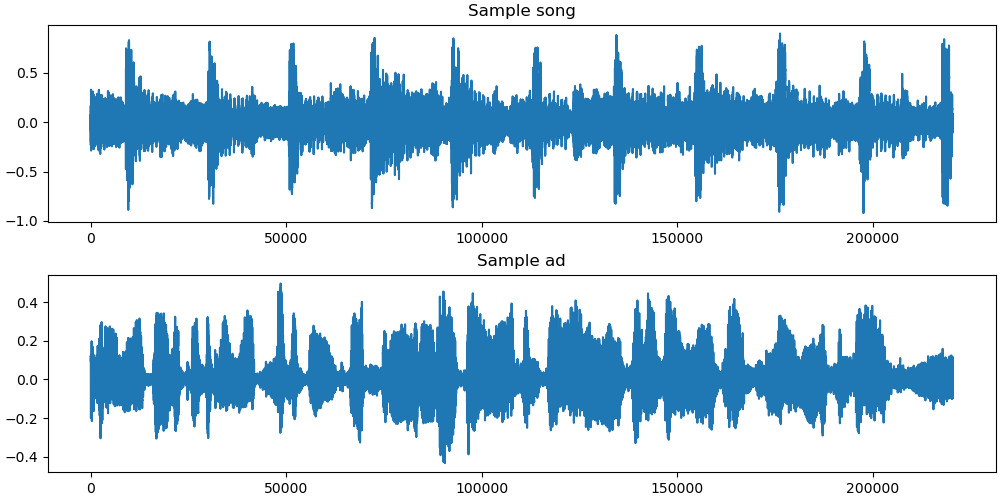

In [121]:
fig, ax = plt.subplots(2, 1, layout="constrained", figsize=(10, 5))

ax = ax.flatten()

ax[0].plot(sample_song)
ax[0].set_title("Sample song")

ax[1].plot(sample_ad)
ax[1].set_title("Sample ad")

plt.savefig("graphics/sample_plots.png", dpi=400)

plt.show()

In [69]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n(N={absolute:d})"

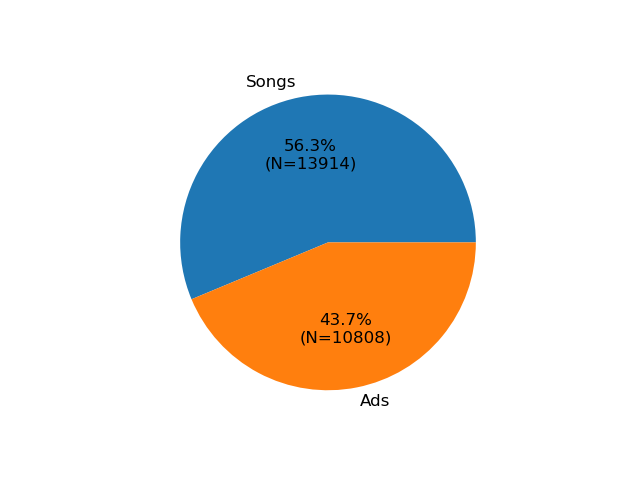

In [70]:
plt.close("all")

fig, ax = plt.subplots()

ax.pie(class_sizes, labels=["Songs", "Ads"], autopct=lambda pct : func(pct, class_sizes), textprops={"fontsize" : 12})

plt.savefig("graphics/preliminary_class_distribution.png", dpi=400)

plt.show()

## Feature extraction

### Pitch

Not using [crepe](https://pypi.org/project/crepe/) due to tensorflow requirement and numpy version conflict. Using [librosa](https://librosa.org/doc/main/generated/librosa.piptrack.html)

In [74]:
# songs = [x for x in os.listdir("resampled_songs")]
# ads = [x for x in os.listdir("resampled_ads")]

# idx = 0

# f_s, audio = wavfile.read(f"resampled_songs/{songs[idx]}")
# time, frequency, confidence, activation = crepe.predict(audio, f_s, viterbi=True)

In [32]:
idx = 0
y = df.iloc[idx]["data"].astype(np.float32)
f_s = df.iloc[idx]["sampleRate"]

In [33]:
pitches, magnitudes = librosa.piptrack(y=y, sr=f_s)

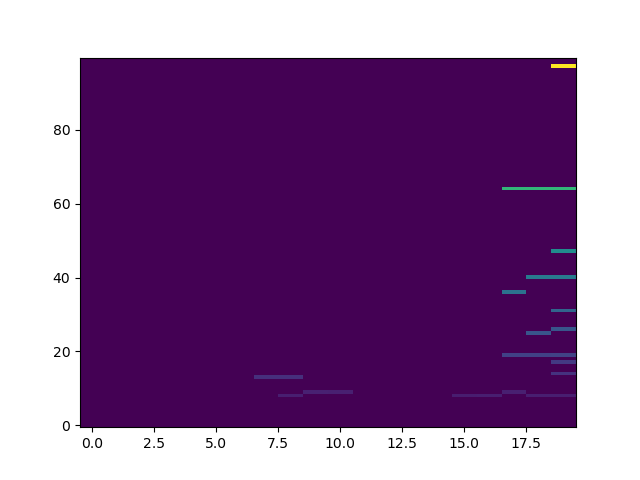

In [57]:
plt.close("all")

fig = plt.figure()

plt.imshow(pitches[:100, :], aspect="auto", interpolation="nearest", origin="lower")

plt.show()

### Tempo

Using [librosa](https://librosa.org/doc/0.10.1/generated/librosa.beat.beat_track.html#librosa.beat.beat_track)

In [71]:
idx = 0
y = df.iloc[idx]["data"].astype(np.float32)
f_s = df.iloc[idx]["sampleRate"]

In [72]:
tempo, beats = librosa.beat.beat_track(y=y, sr=f_s)

In [73]:
tempo

139.6748310810811

All

In [87]:
all_tempo = []
all_labels = []
for idx in range(len(df)):
    y = df.iloc[idx]["data"].astype(np.float32)
    f_s = df.iloc[idx]["sampleRate"]
    try:
        tempo, _ = librosa.beat.beat_track(y=y, sr=f_s)
    except ValueError:
        continue
    all_tempo.append(tempo)
    all_labels.append(df.iloc[idx]["label"])

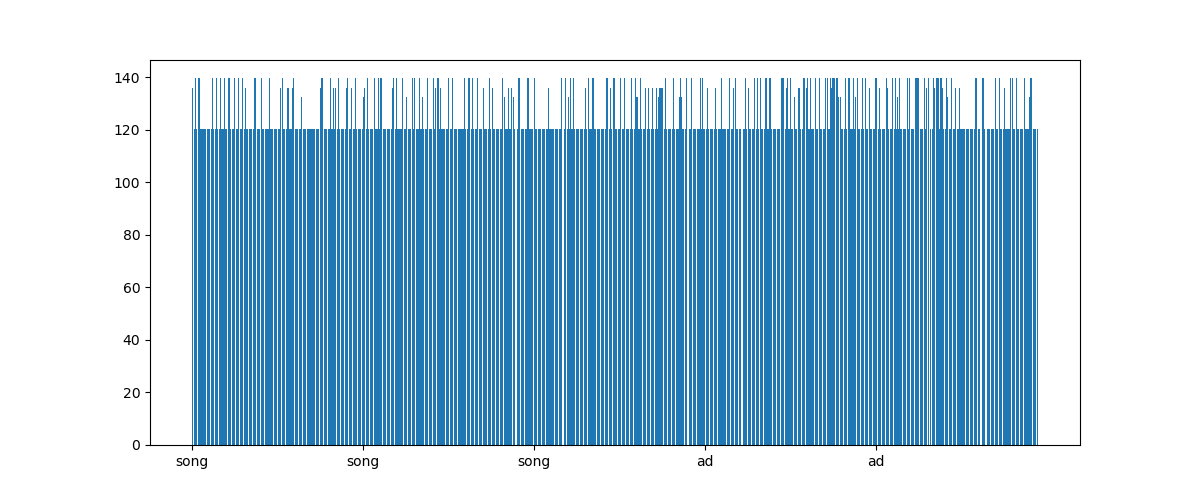

In [112]:
plt.close("all")

fig, ax = plt.subplots(figsize=(12, 5))

plt.bar(np.arange(len(all_tempo)), all_tempo)

xticks = [x for x in ax.get_xticks() if x >= 0 and x <= len(all_tempo)]
labels = [all_labels[int(x)] for x in ax.get_xticks() if x >= 0 and x <= len(all_tempo)]

plt.xticks(xticks, labels)

plt.savefig("graphics/preliminary_class_distribution.png", dpi=400)

plt.show()

### MFCC

In [46]:
mfcc = librosa.feature.mfcc(y=y, sr=f_s)

In [48]:
mfcc.shape

(20, 20)

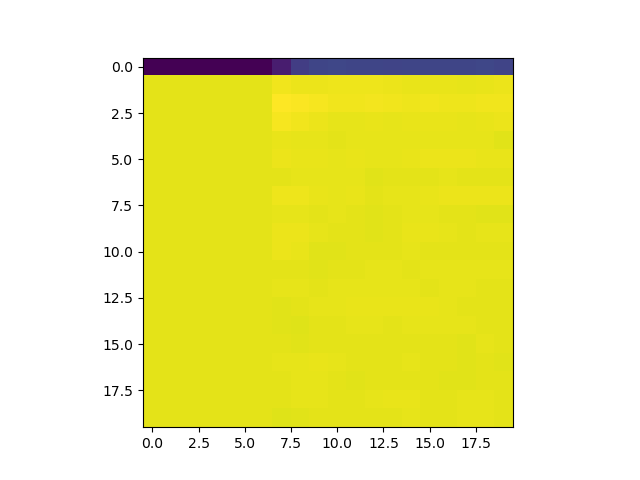

In [60]:
plt.close("all")

fig = plt.figure()

plt.imshow(mfcc)

plt.show()